In [1]:
#here's my attempt at writing a different NN to tackle my problem... this is an inception network. lets see if it works
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
IMG_SIZE=200

In [3]:
#some errors in this class thing so we'll see later....
class InceptionTime(keras.layers.Layer):
    def __init__(self, num_filters=32, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.num_filters=num_filters
        self.activation=keras.activations.get(activation)
        #self.conv1=keras.layers.Conv1D(filters=8, kernel_size=1, padding="same", strides=1, activation="tanh")
        #self.conv1_2=keras.layers.Conv1D(filters=8, kernel_size=1, padding="same", strides=1, activation="tanh")
        #self.conv10=keras.layers.Conv1D(filters=8, kernel_size=10, padding="same", strides=1, activation="tanh")
        #self.conv20=keras.layers.Conv1D(filters=8, kernel_size=20, padding="same", strides=1, activation="tanh")
        #self.conv40=keras.layers.Conv1D(filters=8, kernel_size=40, padding="same", strides=1, activation="tanh")

    def call(self, inputs,training=None):
        bN = keras.layers.Conv1D(filters=self.num_filters, kernel_size=1, padding="same", strides=1, activation="tanh")(inputs)
        mP = keras.layers.MaxPool1D(3,strides=1 ,data_format='channels_last',padding='same')(inputs)
        z1 = keras.layers.Conv1D(filters=self.num_filters, kernel_size=3, padding="same", strides=1, activation="tanh")(bN)
        z2 = keras.layers.Conv1D(filters=self.num_filters, kernel_size=7, padding="same", strides=1, activation="tanh")(bN)
        z3 = keras.layers.Conv1D(filters=self.num_filters, kernel_size=11, padding="same", strides=1, activation="tanh")(bN)
        z4 = keras.layers.Conv1D(filters=self.num_filters, kernel_size=1, padding="same", strides=1, activation="tanh")(mP)
        z = keras.layers.Concatenate(axis=2)([z1,z2,z3,z4])
        z = keras.layers.BatchNormalization()(z)
        return self.activation(z)

In [14]:
ip = keras.layers.Input(shape=(IMG_SIZE,1),name='Input')
x = keras.layers.Reshape((IMG_SIZE, 1), input_shape=(IMG_SIZE,),name='reshape_1')(ip)
x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", strides=1, activation="tanh")(x)

y = keras.layers.Conv1D(filters=32, kernel_size=1, padding="same", strides=2, activation="tanh",name='bypass')(x)
#y = keras.layers.Conv1D(filters=32, kernel_size=1, padding="same", strides=2, activation="relu",name='bypass2')(y)
y = keras.layers.BatchNormalization()(y)

bN1 = keras.layers.Conv1D(filters=8, kernel_size=1, padding="same", strides=1, activation="tanh")(x)
bN2 = keras.layers.Conv1D(filters=8, kernel_size=1, padding="same", strides=1, activation="tanh")(x)
bN3 = keras.layers.Conv1D(filters=8, kernel_size=1, padding="same", strides=1, activation="tanh")(x)
mP = keras.layers.MaxPool1D(3,strides=1 ,data_format='channels_last',padding='same')(x)
z1 = keras.layers.Conv1D(filters=8, kernel_size=5, padding="same", strides=1, activation="tanh")(bN1)
z2 = keras.layers.Conv1D(filters=8, kernel_size=15, padding="same", strides=1, activation="tanh")(bN2)
z3 = keras.layers.Conv1D(filters=8, kernel_size=35, padding="same", strides=1, activation="tanh")(bN3)
z4 = keras.layers.Conv1D(filters=4, kernel_size=1, padding="same", strides=1, activation="tanh")(mP)
z = keras.layers.Concatenate(axis=2)([z1,z2,z3,z4])
z = keras.layers.BatchNormalization()(z)

z  = keras.layers.AveragePooling1D(3,strides=1,padding='same')(z)

bNI1 = keras.layers.Conv1D(filters=16, kernel_size=1, padding="same", strides=1, activation="tanh")(z)
bNI2 = keras.layers.Conv1D(filters=16, kernel_size=1, padding="same", strides=1, activation="tanh")(z)
bNI3 = keras.layers.Conv1D(filters=16, kernel_size=1, padding="same", strides=1, activation="tanh")(z)
mPI = keras.layers.MaxPool1D(3,strides=1 ,data_format='channels_last',padding='same')(z)
zI1 = keras.layers.Conv1D(filters=16, kernel_size=5, padding="same", strides=1, activation="tanh")(bNI1)
zI2 = keras.layers.Conv1D(filters=16, kernel_size=15, padding="same", strides=1, activation="tanh")(bNI2)
zI3 = keras.layers.Conv1D(filters=16, kernel_size=35, padding="same", strides=1, activation="tanh")(bNI3)
zI4 = keras.layers.Conv1D(filters=8, kernel_size=1, padding="same", strides=1, activation="tanh")(mPI)
zI = keras.layers.Concatenate(axis=2)([zI1,zI2,zI3,zI4])
zI = keras.layers.BatchNormalization()(zI)

zI  = keras.layers.AveragePooling1D(3,strides=2,padding='same')(zI)

bNII1 = keras.layers.Conv1D(filters=32, kernel_size=1, padding="same", strides=1, activation="tanh")(zI)
bNII2 = keras.layers.Conv1D(filters=32, kernel_size=1, padding="same", strides=1, activation="tanh")(zI)
bNII3 = keras.layers.Conv1D(filters=32, kernel_size=1, padding="same", strides=1, activation="tanh")(zI)
mPII = keras.layers.MaxPool1D(3,strides=1 ,data_format='channels_last',padding='same')(zI)
z1II = keras.layers.Conv1D(filters=32, kernel_size=5, padding="same", strides=1, activation="tanh")(bNII1)
z2II = keras.layers.Conv1D(filters=32, kernel_size=15, padding="same", strides=1, activation="tanh")(bNII2)
z3II = keras.layers.Conv1D(filters=32, kernel_size=35, padding="same", strides=1, activation="tanh")(bNII3)
z4II = keras.layers.Conv1D(filters=16, kernel_size=1, padding="same", strides=1, activation="tanh")(mPII)
zII = keras.layers.Concatenate(axis=2,name='bypassed_here')([z1II,z2II,z3II,z4II,y])
zII = keras.layers.BatchNormalization()(zII)

zII  = keras.layers.AveragePooling1D(3,strides=2,padding='same')(zII)

zII = keras.layers.Flatten()(zII)
zII = keras.layers.Dense(128,activation='relu')(zII)
zII = keras.layers.Dense(64,activation='relu')(zII)
zII =  keras.layers.Dense(1,activation='relu')(zII)
zII =  keras.layers.Dense(2,activation='softmax')(zII)

NN = keras.Model(inputs=ip, outputs=zII ,name='Convolutional_NN')
NN.summary()


lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.00005,decay_steps=500,decay_rate=0.5)
NN.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 200, 1)]     0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 200, 1)       0           Input[0][0]                      
__________________________________________________________________________________________________
conv1d_37 (Conv1D)              (None, 200, 64)      256         reshape_1[0][0]                  
__________________________________________________________________________________________________
conv1d_38 (Conv1D)              (None, 200, 8)       520         conv1d_37[0][0]                  
___________________________________________________________________________________

(11410, 200) (11410, 2)
(9128, 200) (2282, 200)


<function matplotlib.pyplot.show(close=None, block=None)>

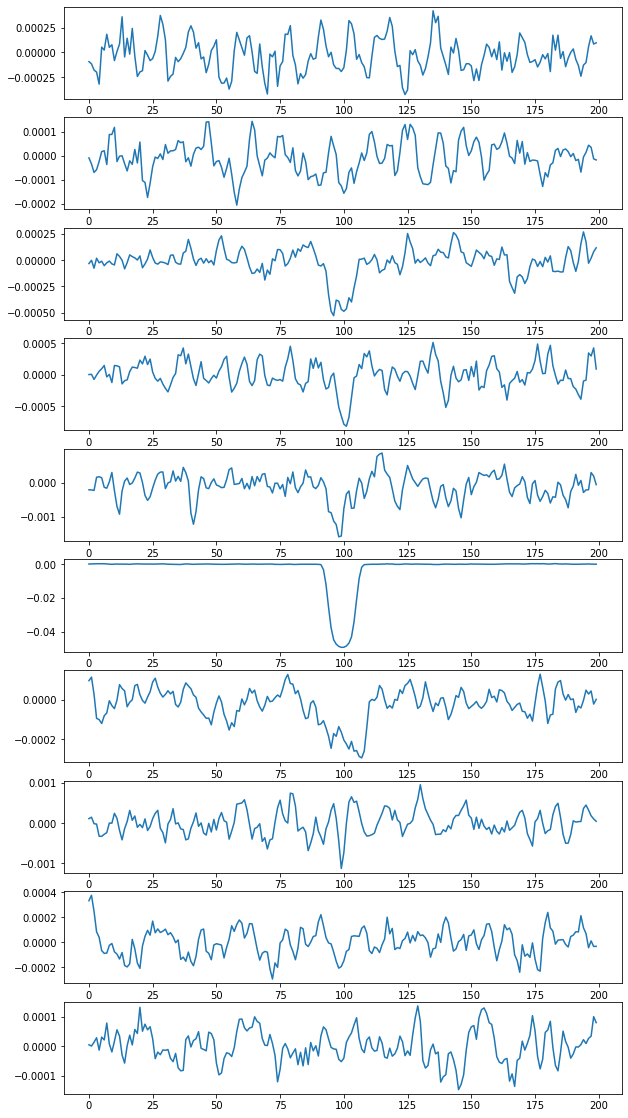

In [16]:
np.random.seed(1234567)
X_train=np.loadtxt('training_data/Xtrain_av_raw200_2_2d0_v2.csv',delimiter=',')
Y_train=np.loadtxt('training_data/Ytrain_av_raw200_2_2d0_v2.csv',delimiter=',')
print(X_train.shape,Y_train.shape)
kernel_size = 3
kernel = np.ones(kernel_size) / kernel_size
X_train = np.array([np.convolve(X_train[i], kernel, mode='same') for i in range(len(X_train))])
#X_train=preprocessing.normalize(X_train)
#X_train=-X_train
#scalar=preprocessing.StandardScaler()
#scalar.fit(X_train)
#X_train=scalar.transform(X_train)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_train, Y_train, test_size=0.2)
print(Xtrain.shape,Xtest.shape)

vararr=np.random.randint(0,len(Xtrain),size=10)
fig,ax=plt.subplots(10,1,figsize=(10,20))
for i in range(0,10):
    ax[i].plot(Xtrain[vararr[i]])

plt.show


In [23]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#history=convNN.fit([np.array(Xtrain),np.array(Xtrainl)],np.array(Ytrain), batch_size=64, epochs=40, verbose=VERBOSE, validation_split=0.12,callbacks=[es_callback])
history=NN.fit(np.array(Xtrain),np.array(Ytrain), batch_size=64, epochs=20  , verbose=1 ,shuffle=True, validation_split=0.2)

Epoch 1/20
115/115 [==============================] - 33s 285ms/step - loss: 0.5766 - accuracy: 0.7154 - val_loss: 0.5847 - val_accuracy: 0.7037
Epoch 2/20
115/115 [==============================] - 32s 278ms/step - loss: 0.5768 - accuracy: 0.7123 - val_loss: 0.5847 - val_accuracy: 0.7032
Epoch 3/20
115/115 [==============================] - 32s 274ms/step - loss: 0.5767 - accuracy: 0.7109 - val_loss: 0.5847 - val_accuracy: 0.7026
Epoch 4/20
115/115 [==============================] - 32s 276ms/step - loss: 0.5754 - accuracy: 0.7149 - val_loss: 0.5848 - val_accuracy: 0.7032
Epoch 5/20
115/115 [==============================] - 32s 276ms/step - loss: 0.5763 - accuracy: 0.7127 - val_loss: 0.5848 - val_accuracy: 0.7037
Epoch 6/20
115/115 [==============================] - 32s 275ms/step - loss: 0.5759 - accuracy: 0.7169 - val_loss: 0.5847 - val_accuracy: 0.7032
Epoch 7/20
115/115 [==============================] - 32s 276ms/step - loss: 0.5760 - accuracy: 0.7139 - val_loss: 0.5847 - val_ac

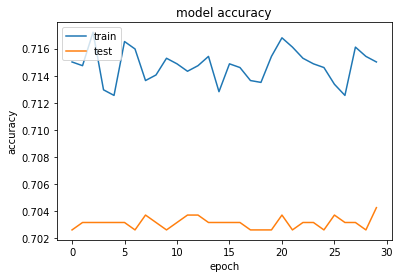

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('macc_SandN_raw500.png')
plt.show()

In [24]:
#current verdict? it does quite well on the 2d5 thing... much better than i imagined. Not so much for the 2d0 thing... but maybe that lightcurve needs 
#rebinning... and  i havent fine tuned it or anything yet.
test_loss, test_acc = NN.evaluate(np.array(Xtest), np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=NN.predict(np.array(Xtest))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytest,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

72/72 [==============================] - 2s 28ms/step - loss: 0.5886 - accuracy: 0.7068
Test accuracy: 0.7068361043930054
[[855 305]
 [364 758]]
